# Imports

In [1]:
import pandas as pd
from datetime import datetime
import re

import numpy as np
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier, Pool

import matplotlib.pyplot as plt

# Data

## Loading raw data

In [2]:
def read_train_data():
    d1 = pd.read_csv('data/train01.csv', sep=';')
    d2 = pd.read_csv('data/train02.csv', sep=';')
    d = pd.concat([d1, d2], sort=False)
    d = d.reset_index()
    d = d.drop(columns=['index'])
    return d

In [3]:
def read_test_data():
    return pd.read_csv('data/test.csv', sep=';')

In [4]:
train_raw_data = read_train_data()
test_raw_data = read_test_data()

## Let's look at the data

In [5]:
train_raw_data

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
0,-9196902500682081904,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,2066976859146697559,0,[4770.1499999999996 885.49000000000001 1956.36...,...,"[nan, nan, nan, nan, nan, nan]","[3.0, 2.0, 1.0, nan, nan, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
1,-9196902500682081900,0,-2201458060675810556,05.02.2013,4293238556669161936,182,-8.465179e+18,-8648529837587014226,0,[328.93000000000001 3.9700000000000002 996.149...,...,"[nan, nan, nan, nan, nan, nan]","[4.0, nan, nan, 2.0, 3.0, 7.0]","[90.27, 90.27, 90.27, 90.27, 90.27, 90.27]","[249.94, 249.94, 249.94, 249.94, 155.64, 155.64]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[103.09, 103.09, 103.09, 103.09, 103.09, 103.09]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
2,-9196902500682081899,0,-2201458060675810556,01.09.2008,6312572492787112517,175,5.417474e+18,-5480331477604673780,1,[0.28000000000000003 0.39000000000000001 387.1...,...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, 2.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[196.61, 224.79, 197.55, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
3,-9196902500682081897,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,-3150357754345161454,0,[146.28999999999999 688.25999999999999 1025.88...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, 1.0, 2.0, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
4,-9196902500681081897,0,-2201458060675810556,01.09.2008,6312572492787112517,179,6.856367e+18,4900304581511328621,2,[nan nan nan nan nan nan nan nan nan nan nan n...,...,"[nan, nan, nan, nan, nan, nan]","[3.0, nan, 2.0, nan, 1.0, 5.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
5,-9196902500681081889,0,-2201458060675810556,01.09.2008,6312572492787112517,182,3.052557e+18,-8367157107954005236,0,[1742.8800000000001 746.35000000000002 6151.04...,...,"[nan, nan, nan, 0.0, nan, nan]","[nan, nan, nan, nan, nan, 2.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
6,-9196902500680081900,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-8.465179e+18,-4521300458729327843,0,[347.82999999999998 109.25 259.18000000000001 ...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, 1.0, nan, 2.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[212.22, 212.22, 212.22, 212.22, 212.22, 212.22]","[nan, nan, nan, nan, nan, nan]","[77.19, 77.19, 77.19, 77.19, 77.19, 77.19]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
7,-9196902500679081900,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-8.465179e+18,-736065849

Looks crappy...

I think we should take a closer look at each column

### Column "id"

In [6]:
train_id = train_raw_data['id'].to_numpy()
test_id = test_raw_data['id'].to_numpy()

In [7]:
train_id

array([-9196902500682081904, -9196902500682081900, -9196902500682081899,
       ...,  9162040885608725770,  9162040885608725772,
        9162040885609725775])

In [8]:
test_id

array([-9196902500682081904, -9196902500681081889, -9196902500679081891,
       ...,  9162040885604725791,  9162040885608725764,
        9162040885608725772])

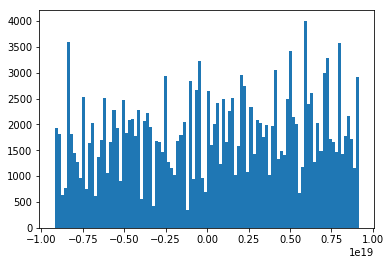

In [9]:
plt.hist(train_id, bins=100)
plt.show()

In [10]:
unique_train_id = set(train_id.tolist())

print(f'Train datasamples: {len(train_id)}')
print(f'Unique train ids: {len(unique_train_id)}')

Train datasamples: 185135
Unique train ids: 119967


o_0 !?!?1

Let's look at rows with same ids

In [11]:
unique_id = set()
for i in range(len(train_id)):
    id_i = train_id[i]
    
    if id_i in unique_id:
        print(f'id: {id_i}')
        break
        
    unique_id.add(id_i)

id: -9196902500682081897


In [12]:
ilocs = np.where(train_id == -9196902500682081897)[0]
train_raw_data.iloc[ilocs]

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
3,-9196902500682081897,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,-3150357754345161454,0,[146.28999999999999 688.25999999999999 1025.88...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, 1.0, 2.0, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
91946,-9196902500682081897,0,-2201458060675810556,01.09.2008,6312572492787112517,184,-6.347413e+18,-3150357754345161454,0,[607.29999999999995 66.569999999999993 254.770...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, 1.0, 2.0, 1.0, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


Ok... They are different and I have no idea what to do about it. I will just ignore id column. I don't think that it contain some information.

In [13]:
unique_train_id = set(train_id.tolist())
unique_test_id = set(test_id.tolist())
unique_id = set(list(unique_train_id) + list(unique_test_id))

print(f'Unique train ids: {len(unique_train_id)}')
print(f'Unique test ids: {len(unique_test_id)}')
print(f'Sum: {len(unique_train_id) + len(unique_test_id)}')
print(f'Unique ids: {len(unique_id)}')

Unique train ids: 119967
Unique test ids: 23386
Sum: 143353
Unique ids: 122721


...

In [14]:
for id_i in unique_test_id:
    if id_i in unique_train_id:
        print(f'id: {id_i}')
        break

id: 45073277650599939


In [15]:
ilocs = np.where(train_id == 45073277650599939)[0]
train_raw_data.iloc[ilocs]

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
41996,45073277650599939,0,-2846199735157402134,06.01.2016,6312572492787112517,182,7.204363e+18,1791071667082663818,0,[6779.96 16614.360000000001 1387.23 3.06000000...,...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, 4.0, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[196.61, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
134721,45073277650599939,0,-2846199735157402134,06.01.2016,6312572492787112517,184,7.204363e+18,1791071667082663818,0,[5116.6800000000003 11110.209999999999 3987.48...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, 4.0, nan, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


In [16]:
ilocs = np.where(test_id == 45073277650599939)[0]
test_raw_data.iloc[ilocs]

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
10765,45073277650599939,-2846199735157402134,2016-01-06 00:00:00,6312572492787112517,183,7.204363e+18,1791071667082663818,0,[16796.709999999999 0.059999999999999998 0.050...,[16796.709999999999 0.059999999999999998 0.050...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, 4.0, nan, nan, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


Cool, same user in train and test set

### Column "y"

In [17]:
train_y = train_raw_data['y'].to_numpy()

In [18]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(f'Ones: {(train_y == 1).sum()}')
print(f'Zeros: {(train_y == 0).sum()}')
print(f'Sum: {(train_y == 0).sum() + (train_y == 1).sum()}')
print(f'All samples: {len(train_y)}')

Ones: 4569
Zeros: 180566
Sum: 185135
All samples: 185135


Hm... Looks unbalanced. I will have to somehow take this into account in training

### Column "x1"

In [20]:
train_x1 = train_raw_data['x1'].to_numpy()
test_x1 = test_raw_data['x1'].to_numpy()

In [21]:
train_x1

array([-2201458060675810556, -2201458060675810556, -2201458060675810556,
       ..., -4849479253074186081, -4849479253074186081,
        -710453989236047181])

In [22]:
test_x1

array([-2201458060675810556, -2201458060675810556, -2201458060675810556,
       ..., -2201458060675810556, -4849479253074186081,
       -4849479253074186081])

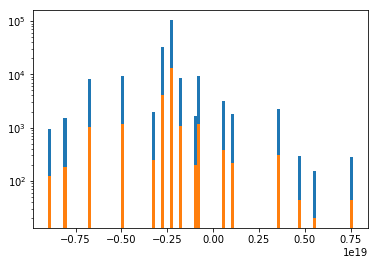

In [23]:
plt.hist(train_x1, bins=100)
plt.hist(test_x1, bins=100)
plt.yscale('log')
plt.show()

In [24]:
unique_train_x1 = set(train_x1.tolist())

print(f'Train datasamples: {len(train_x1)}')
print(f'Unique train x1: {len(unique_train_x1)}')

Train datasamples: 185135
Unique train x1: 17


In [25]:
np.unique(train_x1, return_counts=True)

(array([-8986901603591361589, -8143911097581003611, -6798230330490613937,
        -4849479253074186081, -3197964542876931555, -2846199735157402134,
        -2754918737235326842, -2201458060675810556, -1745247049646957148,
         -903497649946461659,  -710453989236047181,   540536596587825129,
          971936669646667718,  3517883626369402528,  4747018956952676750,
         5528607739791081496,  7609239782882186172]),
 array([   942,   1510,   8123,   9339,   1916,   5882,  26501, 103791,
          8518,   1637,   9100,   3132,   1788,   2233,    291,    151,
           281]))

In [26]:
np.unique(test_x1, return_counts=True)

(array([-8986901603591361589, -8143911097581003611, -6798230330490613937,
        -4849479253074186081, -3197964542876931555, -2846199735157402134,
        -2754918737235326842, -2201458060675810556, -1745247049646957148,
         -903497649946461659,  -710453989236047181,   540536596587825129,
          971936669646667718,  3517883626369402528,  4747018956952676750,
         5528607739791081496,  7609239782882186172]),
 array([  122,   180,  1009,  1158,   240,   754,  3405, 13093,  1073,
          195,  1153,   371,   218,   308,    44,    20,    43]))

I will keep this feature but I will convert it it discrete

### Column "x2"

In [27]:
train_x2 = train_raw_data['x2'].to_numpy()
test_x2 = test_raw_data['x2'].to_numpy()

x2 is date, so I will convert it to timestamp

In [28]:
train_x2

array(['01.09.2008', '05.02.2013', '01.09.2008', ..., '02.12.2013',
       '21.12.2011', '24.09.2013'], dtype=object)

In [29]:
test_x2

array(['2008-09-01 00:00:00', '2008-09-01 00:00:00',
       '2011-03-01 00:00:00', ..., '2011-12-21 00:00:00',
       '2011-12-21 00:00:00', '2011-12-21 00:00:00'], dtype=object)

Mmm... different formats...

In [30]:
train_x2 = train_x2.astype(str)
unique_train_date, train_date_count = np.unique(train_x2, return_counts=True)

test_x2 = test_x2.astype(str)
unique_test_date, test_date_count = np.unique(test_x2, return_counts=True)

In [31]:
print(unique_train_date)
print(train_date_count)

['01.01.2001' '01.01.2011' '01.01.2015' ... '31.12.2015' '31.12.2016'
 'nan']
[ 8  1  1 ... 74  4 83]


In [32]:
print(unique_test_date)
print(test_date_count)

['2002-06-01 00:00:00' '2002-06-17 00:00:00' '2002-08-20 00:00:00' ...
 '2017-03-05 00:00:00' '2017-03-06 00:00:00' 'nan']
[ 1  1  1 ...  1  6 17]


Mmm... 83+17 nan dates... I like this task...

In [33]:
unique_train_date = unique_train_date[:-1]
train_date_count = train_date_count[:-1]

unique_test_date = unique_test_date[:-1]
test_date_count = test_date_count[:-1]

In [34]:
def str_to_timestamp(s):
    if isinstance(s, float):
        return float('nan')
    
    if len(s) == 10:
        return datetime.strptime(s, '%d.%M.%Y').timestamp()
    else:
        return datetime.strptime(s[:10], '%Y-%M-%d').timestamp()

In [35]:
unique_train_timestamp = map(str_to_timestamp, unique_train_date)
unique_train_timestamp = list(unique_train_timestamp)
unique_train_timestamp = np.array(unique_train_timestamp)

unique_test_timestamp = map(str_to_timestamp, unique_test_date)
unique_test_timestamp = list(unique_test_timestamp)
unique_test_timestamp = np.array(unique_test_timestamp)

In [36]:
ids = unique_train_timestamp.argsort()
unique_train_timestamp = unique_train_timestamp[ids]
unique_train_date = unique_train_date[ids]
train_date_count = train_date_count[ids]

ids = unique_test_timestamp.argsort()
unique_test_timestamp = unique_test_timestamp[ids]
unique_test_date = unique_test_date[ids]
test_date_count = test_date_count[ids]

In [37]:
print(unique_train_date)
print(train_date_count)

print(unique_test_date)
print(test_date_count)

['30.12.1899' '01.01.2001' '01.06.2002' ... '30.01.2017' '31.01.2017'
 '26.03.3201']
[ 1  8  5 ... 42 31  2]
['2002-06-01 00:00:00' '2002-09-04 00:00:00' '2002-11-11 00:00:00' ...
 '2017-01-29 00:00:00' '2017-01-30 00:00:00' '2017-01-31 00:00:00']
[1 1 1 ... 2 8 4]


In [38]:
unique_train_timestamp = unique_train_timestamp[1:-1]
unique_train_date = unique_train_date[1:-1]
train_date_count = train_date_count[1:-1]

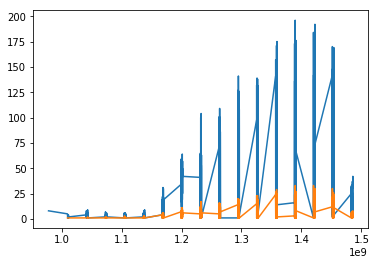

In [39]:
plt.plot(unique_train_timestamp, train_date_count)
plt.plot(unique_test_timestamp, test_date_count)
plt.show()

Interesting...

### Column "x3"

In [40]:
train_x3 = train_raw_data['x3'].to_numpy()
test_x3 = test_raw_data['x3'].to_numpy()

In [41]:
train_x3

array([6312572492787112517, 4293238556669161936, 6312572492787112517, ...,
       6312572492787112517, 6312572492787112517, 6312572492787112517])

In [42]:
test_x3

array([6312572492787112517, 6312572492787112517, 6312572492787112517, ...,
       6312572492787112517, 6312572492787112517, 6312572492787112517])

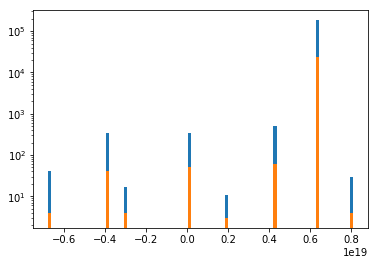

In [43]:
plt.hist(train_x3, bins=100)
plt.hist(test_x3, bins=100)
plt.yscale('log')
plt.show()

In [44]:
np.unique(train_x3, return_counts=True)

(array([-6781590248149341765, -3841363727722191642, -2923021867703621976,
          129299730935700909,  1951343059756149586,  4293238556669161936,
         6312572492787112517,  6338327698974347012,  8072834761538087388]),
 array([    42,    346,     17,    342,     11,    518, 183775,     54,
            30]))

In [45]:
np.unique(test_x3, return_counts=True)

(array([-6781590248149341765, -3841363727722191642, -2923021867703621976,
          129299730935700909,  1951343059756149586,  4293238556669161936,
         6312572492787112517,  6338327698974347012,  8072834761538087388]),
 array([    4,    40,     4,    50,     3,    61, 23216,     4,     4]))

Looks like something that should be dropped. But I will keep it after discretization.

### Colum "x4"

In [46]:
train_x4 = train_raw_data['x4'].to_numpy()
test_x4 = test_raw_data['x4'].to_numpy()

In [47]:
train_x4

array([182, 182, 175, ..., 184, 184, 184])

In [48]:
test_x4

array([183, 183, 137, ..., 183, 166, 183])

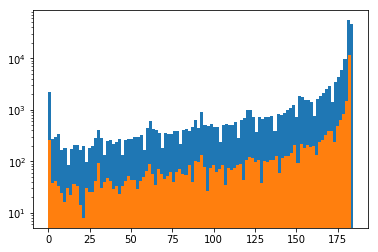

In [49]:
plt.hist(train_x4, bins=100)
plt.hist(test_x4, bins=100)
plt.yscale('log')
plt.show()

In [50]:
np.unique(train_x4, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [51]:
np.unique(test_x4, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

### Column "x5"

In [52]:
train_x5 = train_raw_data['x5'].to_numpy()
test_x5 = test_raw_data['x5'].to_numpy()

In [53]:
train_x5

array([-6.34741325e+18, -8.46517905e+18,  5.41747352e+18, ...,
        7.59905378e+18,  7.59905378e+18, -6.34741325e+18])

In [54]:
test_x5

array([-6.34741325e+18,  3.05255731e+18, -8.46517905e+18, ...,
       -8.46517905e+18,  7.59905378e+18,  7.59905378e+18])

/home/grigory/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/grigory/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


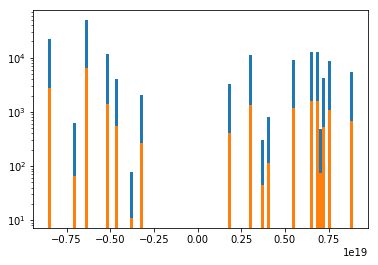

In [55]:
plt.hist(train_x5, bins=100)
plt.hist(test_x5, bins=100)
plt.yscale('log')
plt.show()

In [56]:
np.unique(train_x5, return_counts=True)

(array([-8.55246375e+18, -8.52300049e+18, -8.46517905e+18, ...,
                    nan,             nan,             nan]),
 array([   39,   139, 21824, ...,     1,     1,     1]))

In [57]:
np.unique(test_x5, return_counts=True)

(array([-8.55246375e+18, -8.52300049e+18, -8.46517905e+18, ...,
                    nan,             nan,             nan]),
 array([   8,   21, 2720, ...,    1,    1,    1]))

In [58]:
print(f'Nan in train: {np.isnan(train_x5).sum()}')
print(f'Nan in test: {np.isnan(test_x5).sum()}')

Nan in train: 26546
Nan in test: 3318


Great...

### Column "x6"

In [59]:
train_x6 = train_raw_data['x6'].to_numpy()
test_x6 = test_raw_data['x6'].to_numpy()

In [60]:
train_x6

array([ 2066976859146697559, -8648529837587014226, -5480331477604673780,
       ...,  2066976859146697559,  3845591331902334465,
        1858809495765967867])

In [61]:
test_x6

array([ 2066976859146697559, -8367157107954005236,  2066976859146697559,
       ...,  2066976859146697559,  2066976859146697559,
        3845591331902334465])

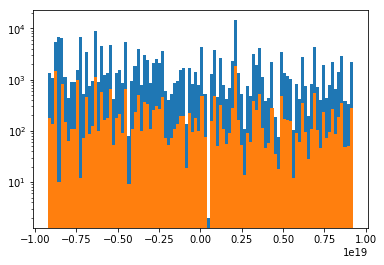

In [62]:
plt.hist(train_x6, bins=100)
plt.hist(test_x6, bins=100)
plt.yscale('log')
plt.show()

In [63]:
unique_train_x6, train_x6_count = np.unique(train_x6, return_counts=True)
unique_test_x6, test_x6_count = np.unique(test_x6, return_counts=True)

In [64]:
print(f'Unique train x6: {len(unique_train_x6)}')
print(f'Unique test x6: {len(unique_test_x6)}')

Unique train x6: 591
Unique test x6: 482


In [65]:
for i in range(len(unique_test_x6)):
    x6 = unique_test_x6[i]
    if x6 not in unique_train_x6:
        print("Not in train:", x6, test_x6_count[i])

Not in train: -5193421944580334248 1
Not in train: 5030685753238303691 1
Not in train: 5306367220679014672 1


Sounds bad... I'll decide what to do with it later.

### Column "x7"

In [66]:
train_x7 = train_raw_data['x7'].to_numpy()
test_x7 = test_raw_data['x7'].to_numpy()

In [67]:
train_x7

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
test_x7

array([0, 0, 2, ..., 0, 1, 0])

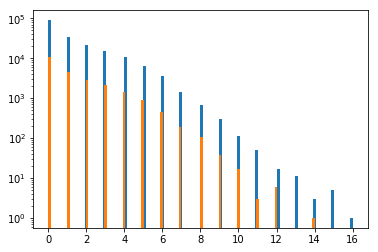

In [69]:
plt.hist(train_x7, bins=100)
plt.hist(test_x7, bins=100)
plt.yscale('log')
plt.show()

In [70]:
unique_train_x7, train_x7_count = np.unique(train_x7, return_counts=True)
unique_test_x7, test_x7_count = np.unique(test_x7, return_counts=True)

### Column "x8"

In [71]:
train_x8 = train_raw_data['x8'].to_numpy()
test_x8 = test_raw_data['x8'].to_numpy()

In [72]:
train_x8

array(['[4770.1499999999996 885.49000000000001 1956.3699999999999\n 36936.040000000001 3478.5599999999999 2374.6100000000001 5470.21\n 6864.1599999999999 6993.4300000000003 5742.9799999999996\n 35850.790000000001 34848.699999999997 24857.610000000001\n 3866.9200000000001 2499.0700000000002 5797.4200000000001\n 6012.7600000000002 2993.71 6771.8400000000001 4891.8800000000001 3429.04\n 4282.1999999999998 2676.3600000000001 3721.1900000000001\n 2610.5900000000001 6206.7799999999997 7455.4899999999998 3476.46\n 2824.8200000000002 2807.0999999999999 1353.3800000000001\n 2554.8000000000002 4702.6599999999999 4065.6599999999999 1072.22\n 2166.6399999999999 729.38999999999999 1349.72 3634.0900000000001\n 3296.3299999999999 1948.3199999999999 2466.5 1149.1800000000001\n 2773.4099999999999 1251.8299999999999 1071.25 3146.3800000000001\n 2776.6599999999999 2697.1999999999998 1145.8 1147.5599999999999\n 937.09000000000003 1358.98 5771.4399999999996 2088.3099999999999\n 3615.5599999999999 1443.46 7

In [73]:
def str_to_arr(s):
    s = s[1:-1]
    s = re.sub('[\n|,]', ' ', s)
    s = re.sub(' +', ' ', s)
    s = s.split(' ')
    return np.array(s, dtype=np.float32)

In [74]:
train_x8 = np.array(list(map(str_to_arr, train_x8)))
test_x8 = np.array(list(map(str_to_arr, test_x8)))

In [75]:
np.unique(list(map(len, train_x8)), return_counts=True)

(array([182, 184]), array([91946, 93189]))

In [76]:
np.unique(list(map(len, test_x8)), return_counts=True)

(array([183]), array([23386]))

In [77]:
train_all_x8 = np.concatenate(train_x8)
ids = np.where(~np.isnan(train_all_x8) * (train_all_x8 != 0))[0]
train_all_x8 = train_all_x8[ids]

test_all_x8 = np.concatenate(test_x8)
ids = np.where(~np.isnan(test_all_x8) * (test_all_x8 != 0))[0]
test_all_x8 = test_all_x8[ids]

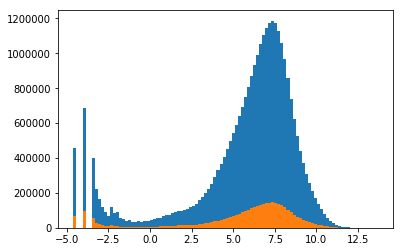

In [78]:
plt.hist(np.log(train_all_x8), bins=100)
plt.hist(np.log(test_all_x8), bins=100)
plt.show()

In [79]:
train_all_x8 = np.concatenate(train_x8)
test_all_x8 = np.concatenate(test_x8)

print('% nan in train:', np.isnan(train_all_x8).sum() / len(train_all_x8))
print('% nan in test:', np.isnan(test_all_x8).sum() / len(test_all_x8))

% nan in train: 0.08821704162469125
% nan in test: 0.08142744783554123


### Column "x9"

In [80]:
train_x9 = train_raw_data['x9'].to_numpy()
test_x9 = test_raw_data['x9'].to_numpy()

In [81]:
train_x9

array(['[4770.1499999999996 885.49000000000001 1956.3699999999999\n 36936.040000000001 3478.5599999999999 2374.6100000000001 5470.21\n 6864.1599999999999 6993.4300000000003 5742.9799999999996\n 35850.790000000001 34848.699999999997 24857.610000000001\n 3866.9200000000001 2499.0700000000002 5797.4200000000001\n 6012.7600000000002 2993.71 6771.8400000000001 4891.8800000000001 3429.04\n 4282.1999999999998 2676.3600000000001 3721.1900000000001\n 2610.5900000000001 6206.7799999999997 7455.4899999999998 3476.46\n 2824.8200000000002 2807.0999999999999 1353.3800000000001\n 2554.8000000000002 4702.6599999999999 4065.6599999999999 1072.22\n 2166.6399999999999 729.38999999999999 1349.72 3634.0900000000001\n 3296.3299999999999 1948.3199999999999 2466.5 1149.1800000000001\n 2773.4099999999999 1251.8299999999999 1071.25 3146.3800000000001\n 2776.6599999999999 2697.1999999999998 1145.8 1147.5599999999999\n 937.09000000000003 1358.98 5771.4399999999996 2088.3099999999999\n 3615.5599999999999 1443.46 7

In [82]:
train_x9 = np.array(list(map(str_to_arr, train_x9)))
test_x9 = np.array(list(map(str_to_arr, test_x9)))

In [83]:
np.unique(list(map(len, train_x9)), return_counts=True)

(array([364, 368]), array([91946, 93189]))

In [84]:
np.unique(list(map(len, test_x9)), return_counts=True)

(array([366]), array([23386]))

In [85]:
train_all_x9 = np.concatenate(train_x9)
ids = np.where(~np.isnan(train_all_x9) * (train_all_x9 != 0))[0]
train_all_x9 = train_all_x9[ids]

test_all_x9 = np.concatenate(test_x9)
ids = np.where(~np.isnan(test_all_x9) * (test_all_x9 != 0))[0]
test_all_x9 = test_all_x9[ids]

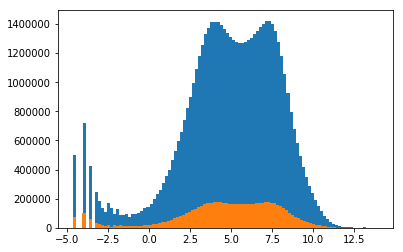

In [86]:
plt.hist(np.log(train_all_x9), bins=100)
plt.hist(np.log(test_all_x9), bins=100)
plt.show()

In [87]:
train_all_x9 = np.concatenate(train_x9)
test_all_x9 = np.concatenate(test_x9)

print('% nan in train:', np.isnan(train_all_x9).sum() / len(train_all_x9))
print('% nan in test:', np.isnan(test_all_x9).sum() / len(test_all_x9))

% nan in train: 0.14123592409515814
% nan in test: 0.1384969943719539


### Columns "x10"-"x42"

In [88]:
keys = list(map(lambda i: f'x{i}', range(10, 43)))

In [89]:
train_x10_42 = {}
test_x10_42 = {}
for k in keys:
    train_x10_42[k] = train_raw_data[k].to_numpy()
    test_x10_42[k] = test_raw_data[k].to_numpy()

In [90]:
for k in keys:
    train_x10_42[k] = np.array(list(map(str_to_arr, train_x10_42[k])))
    test_x10_42[k] = np.array(list(map(str_to_arr, test_x10_42[k])))

In [91]:
for k in keys:
    unique_train_x, train_x_count = np.unique(list(map(len, train_x10_42[k])), return_counts=True)
    unique_test_x, test_x_count = np.unique(list(map(len, test_x10_42[k])), return_counts=True)
    
    print(k, unique_train_x, train_x_count, unique_test_x, test_x_count)

x10 [6] [185135] [6] [23386]
x11 [6] [185135] [6] [23386]
x12 [6] [185135] [6] [23386]
x13 [6] [185135] [6] [23386]
x14 [6] [185135] [6] [23386]
x15 [6] [185135] [6] [23386]
x16 [6] [185135] [6] [23386]
x17 [6] [185135] [6] [23386]
x18 [6] [185135] [6] [23386]
x19 [6] [185135] [6] [23386]
x20 [6] [185135] [6] [23386]
x21 [6] [185135] [6] [23386]
x22 [6] [185135] [6] [23386]
x23 [6] [185135] [6] [23386]
x24 [6] [185135] [6] [23386]
x25 [6] [185135] [6] [23386]
x26 [6] [185135] [6] [23386]
x27 [6] [185135] [6] [23386]
x28 [6] [185135] [6] [23386]
x29 [6] [185135] [6] [23386]
x30 [6] [185135] [6] [23386]
x31 [6] [185135] [6] [23386]
x32 [6] [185135] [6] [23386]
x33 [6] [185135] [6] [23386]
x34 [6] [185135] [6] [23386]
x35 [6] [185135] [6] [23386]
x36 [6] [185135] [6] [23386]
x37 [6] [185135] [6] [23386]
x38 [6] [185135] [6] [23386]
x39 [6] [185135] [6] [23386]
x40 [6] [185135] [6] [23386]
x41 [6] [185135] [6] [23386]
x42 [6] [185135] [6] [23386]


In [92]:
for k in keys:
    all_train_x = np.concatenate(train_x10_42[k])
    ids = np.where(~np.isnan(all_train_x))[0]
    all_train_x = all_train_x[ids]
    unique_train_x, train_x_count = np.unique(all_train_x, return_counts=True)
    
    all_test_x = np.concatenate(test_x10_42[k])
    ids = np.where(~np.isnan(all_test_x))[0]
    all_test_x = all_test_x[ids]
    unique_test_x, test_x_count = np.unique(all_test_x, return_counts=True)
    
    print(k)
    print(unique_train_x, train_x_count)
    print(unique_test_x, test_x_count)
    print('=' * 100)

x10
[1.] [15178]
[1.] [2314]
x11
[1.] [185087]
[1.] [23569]
x12
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] [57740 29815 19875 13974  9804  7667  6428  6702  6207  4716  3790  3325
  6406  7765  4151  3179  2568  2363  2290  2100  1724  1521  1841  4060
  6190  3748  1125  2010 10063 27462 34858]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] [7352 3914 2572 1754 1360 1106  938  984  827  622  525  488  908 1073
  641  410  363  362  364  321  243  234  203  670  865  428  179  247
  985 4746 4907]
x13
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 12. 14. 16.] [422023  78237  13470   2944    719    201     60     19     13      4
      2      2      2      2]
[ 0.  1.  2.  3.  4.  5.  6.  7. 11. 14.] [53663  9622  1624   334    74    23    11     5     1     1]
x14
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 1

x26
[0. 1. 2.] [508967   8718     13]
[0. 1.] [64232  1126]
x27
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 21. 22. 23. 24. 25. 27. 28. 29.] [112826  39266  15400   6817   3260   1690    915    467    284    180
     86     68     41     24     26      9     11      4      7      6
      5      1      3      4      6      1      1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 21. 27. 29.] [14566  4916  1934   832   395   189   111    51    33    23     8     9
     4     2     4     2     1     2     2     3     1     1]
x28
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 34. 35. 36. 37. 38.
 43. 50. 52.] [194536  53902  21628  10377   5296   2921   1751   1076    685    474
    309    216    136    116     88     79     40     30     30     18
     26     17      6      9      9      5     11      5      3      5
      2      5      1      1 

x36
[-132.26  -91.19  -89.51 ...  671.11  694.02  815.69] [ 1  2  2 ...  1  3 31]
[-91.19 -89.51 -81.   -44.25 -21.78  17.35  17.56  22.8   28.71  34.59
  37.89  39.45  42.49  52.23  52.84  53.57  54.05  54.66  55.07  56.32
  56.74  57.1   57.58  58.31  58.92  59.93  61.34  61.35  61.43  61.52
  61.89  62.77  62.97  63.03  63.11  63.7   63.87  63.99  64.08  64.19
  64.27  64.28  64.29  64.4   64.49  64.5   64.6   64.7   64.71  64.87
  65.    65.12  65.63  65.79  65.81  65.96  66.14  66.22  66.3   66.38
  66.54  66.62  66.63  66.72  66.8   67.03  67.04  67.14  67.21  67.22
  67.43  67.44  67.64  67.84  68.05  68.06  68.45  68.65  68.9   69.46
  69.52  69.87  70.07  70.15  70.24  70.27  70.28  70.4   70.48  70.57
  70.78  70.92  70.99  71.08  71.09  71.24  71.41  71.73  71.74  71.89
  71.9   72.08  72.25  72.3   72.42  72.51  72.67  72.71  72.92  73.08
  73.09  73.52  73.92  74.17  74.18  74.33  74.53  74.68  74.73  74.74
  74.76  74.97  75.18  75.55  75.79  75.95  76.02  76.19  76.44  7

x38
[-18.36 -17.99  13.49  23.26  29.42  29.43  29.44  29.45  29.46  29.48
  29.49  29.5   29.51  29.53  29.54  29.55  29.57  29.58  29.59  29.62
  29.64  29.65  29.66  29.67  29.68  29.69  29.75  29.79  29.81  29.82
  29.87  29.89  29.91  29.93  29.94  30.03  30.04  30.07  30.19  30.2
  30.22  30.24  30.26  30.28  30.35  30.36  30.39  30.44  30.56  30.6
  30.62  30.96  30.98  31.01  31.06  31.07  31.2   31.77  31.8   31.85
  31.92  31.93  31.95  32.01  32.02  32.07  32.19  32.2   32.27  32.5
  32.51  32.6   32.69  32.71  32.75  32.78  33.09  33.23  33.39  33.71
  33.84  34.02  34.04  34.07  34.12  34.19  34.2   34.27  34.28  34.36
  34.37  34.45  34.46  34.53  34.54  34.61  34.84  34.85  34.88  35.5
  35.57  35.58  35.62  35.79  36.    36.01  36.15  36.18  36.23  36.47
  36.48  36.74  36.76  36.96  37.07  37.12  37.13  37.21  37.38  37.54
  37.65  37.66  38.26  38.42  38.56  38.6   38.66  38.67  38.83  38.97
  39.14  39.3   39.32  39.48  39.72  39.98  40.21  40.23  40.56  40.57
  40.9

x40
[-285.89 -197.89 -135.03  -21.88   -9.3    15.84   28.41   40.99   53.56
   78.7    91.27  116.42  116.68  128.99  141.56  154.14  166.71  179.28
  186.82  191.85  204.42  217.    229.57  242.14  254.71  267.29  274.83
  279.86  292.43  305.    317.57  330.15  342.72  367.86  380.44  393.01
  430.72  443.3   468.44  493.59  518.73  556.45  589.14  631.88  694.74
  870.75  921.04  958.76 1046.76 1084.48 1122.2  1273.06 1373.64 1386.22
 1625.09 1977.11 2027.4 ] [  13    2    6    1    1    1    1    3    1    2    2 5454    1    2
  212 1309 3253 7327  118   63 1522  110   23   21    7   17    3    6
   31   25    8    1    1   16    4   10   21  296    4    5 1817    7
    2    1   13   61    2    3   47    2    1    2    2    2   34    2
    6]
[-285.89 -210.46 -197.89 -135.03   28.41  116.42  141.56  154.14  166.71
  179.28  186.82  191.85  204.42  217.    229.57  242.14  254.71  267.29
  279.86  292.43  305.    330.15  367.86  393.01  430.72  443.3   493.59
  518.73  589.14  619.

x10


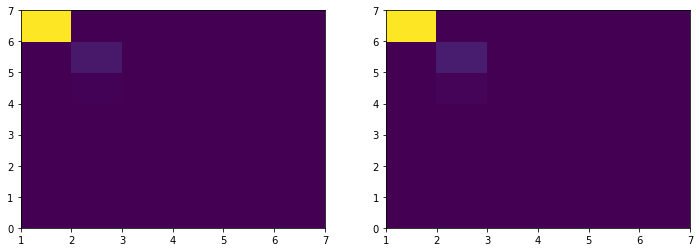

x11


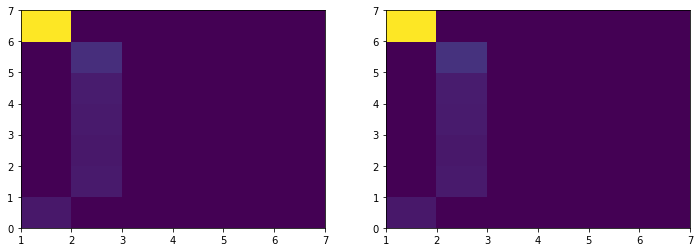

x12


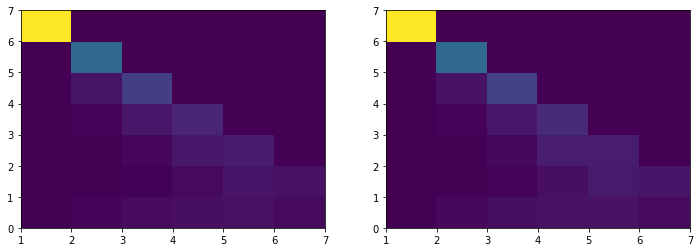

x13


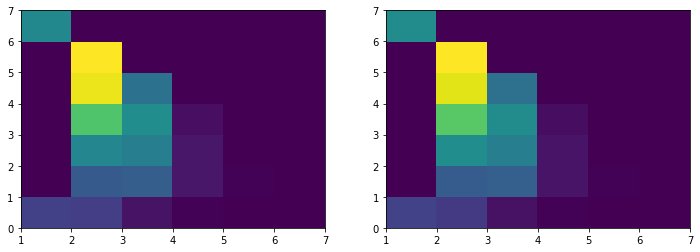

x14


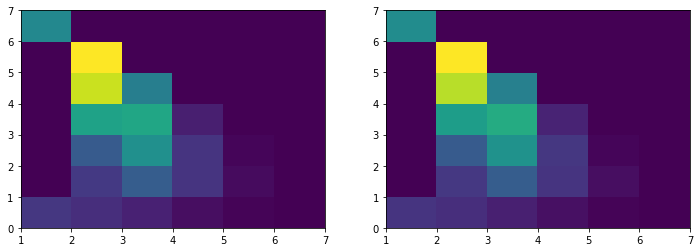

x15


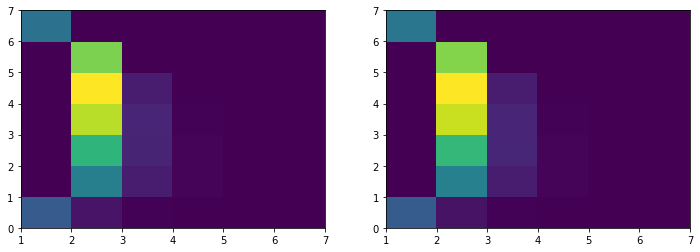

x16


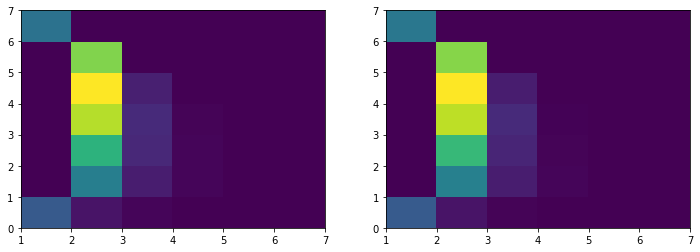

x17


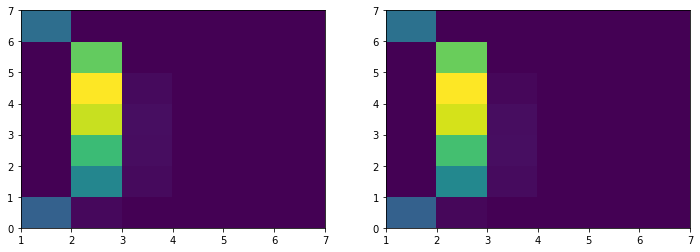

x18


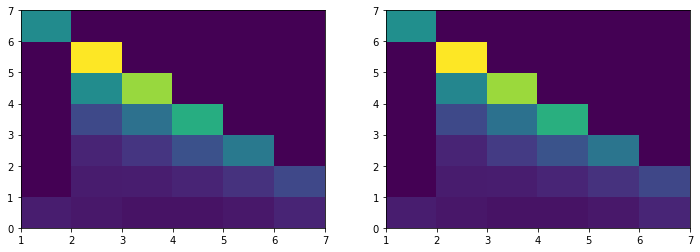

x19


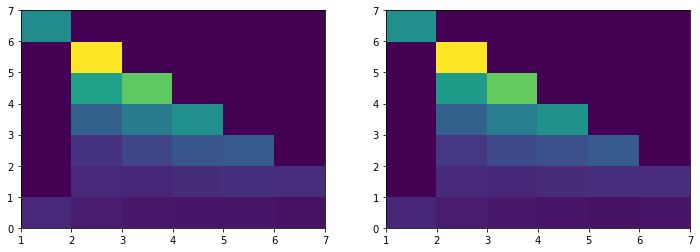

x20


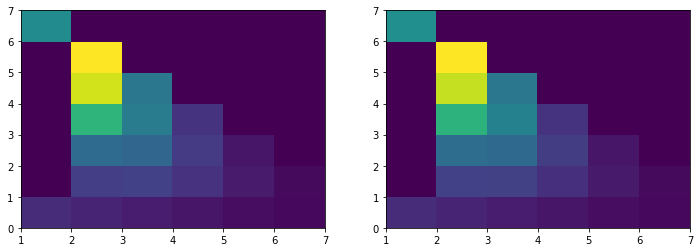

x21


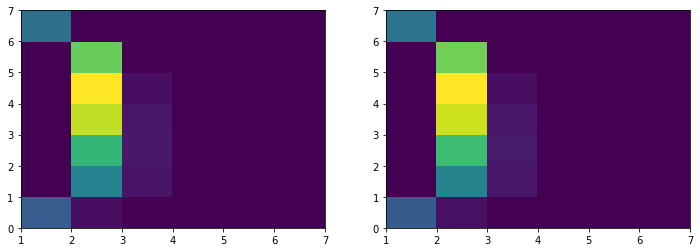

x22


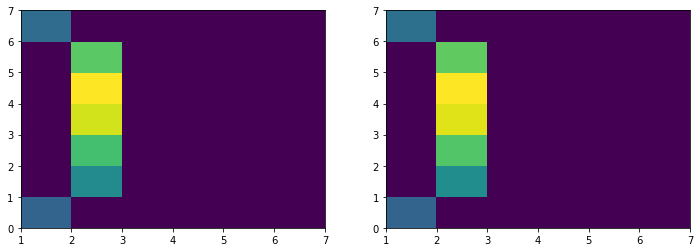

x23


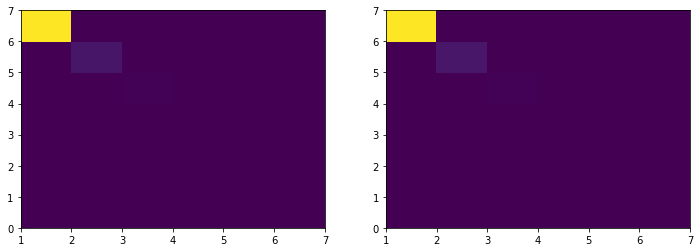

x24


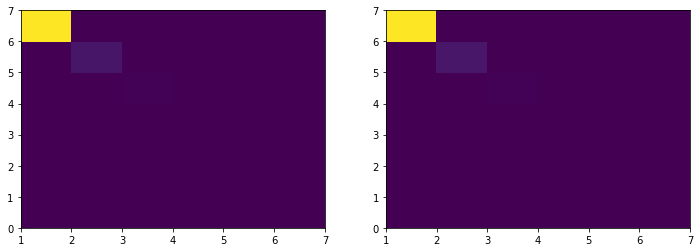

x25


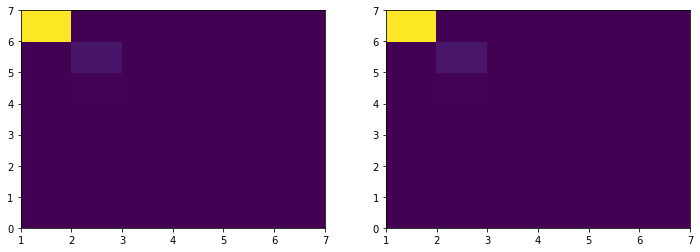

x26


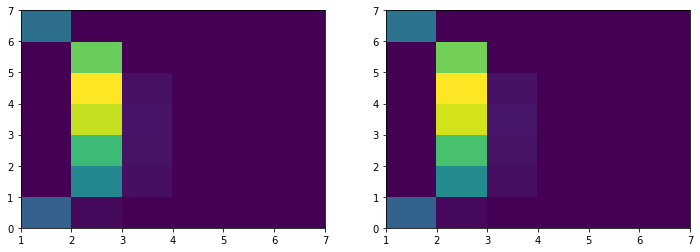

x27


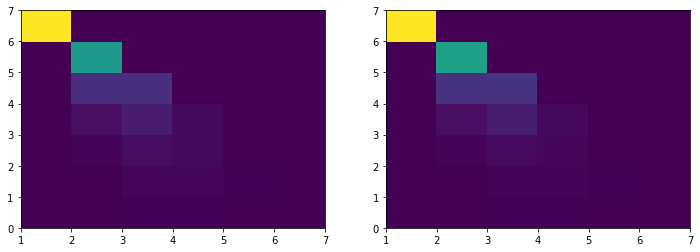

x28


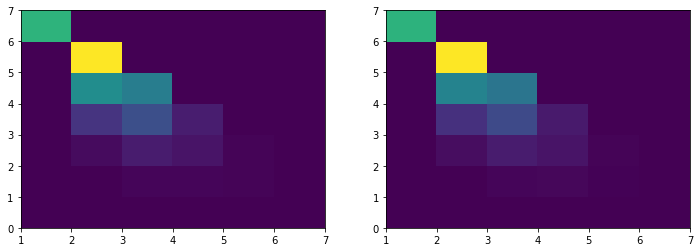

x29


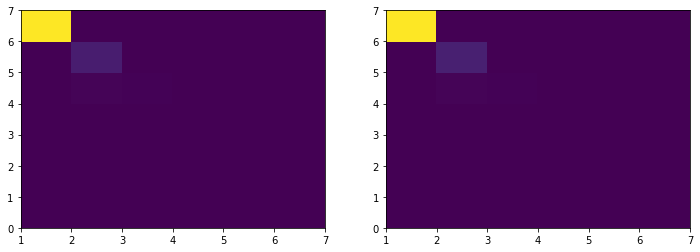

x30


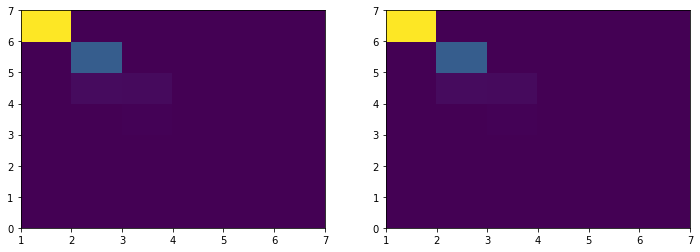

x31


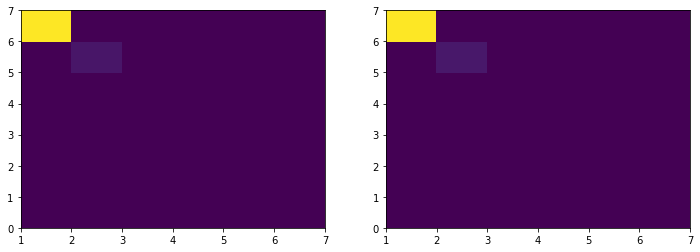

x32


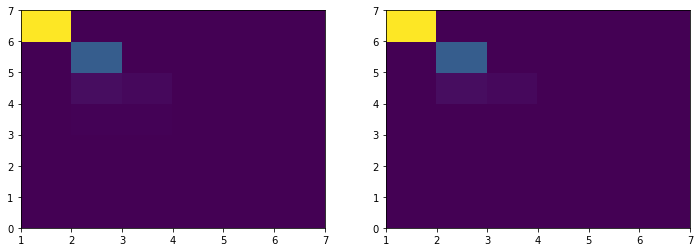

x33


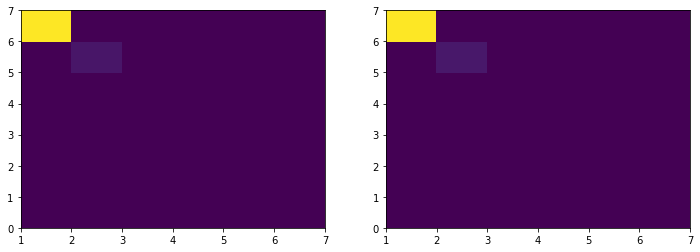

x34


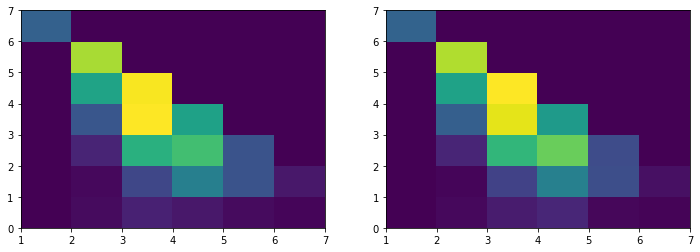

x35


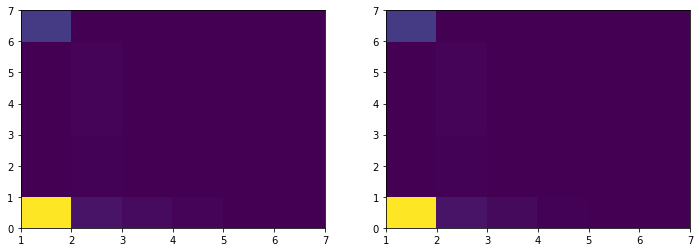

x36


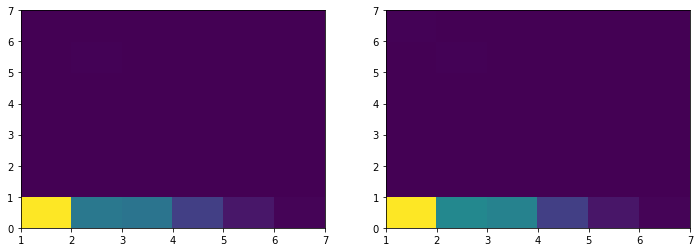

x37


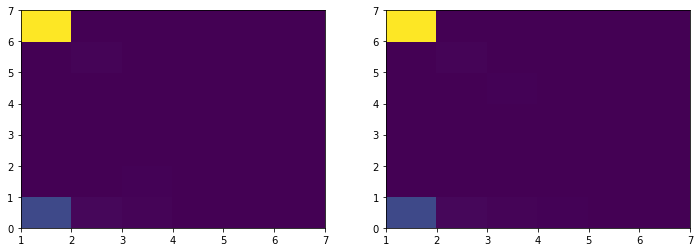

x38


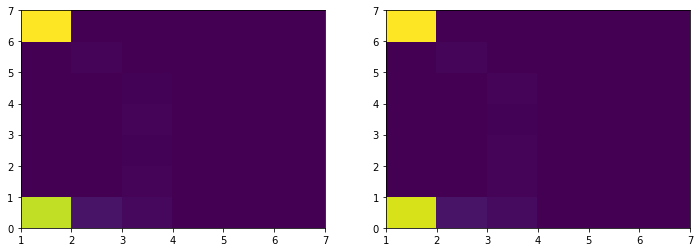

x39


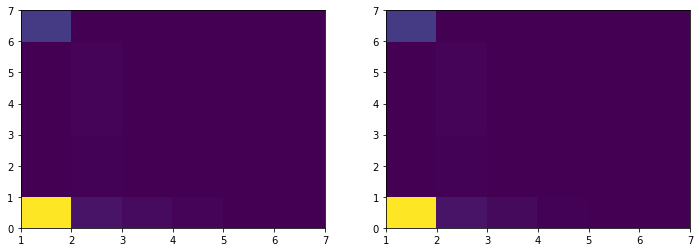

x40


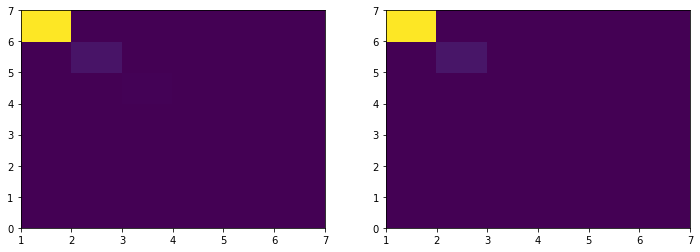

x41


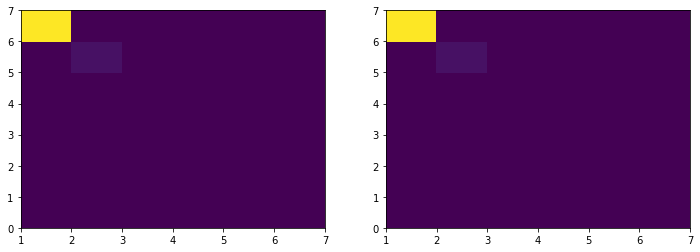

x42


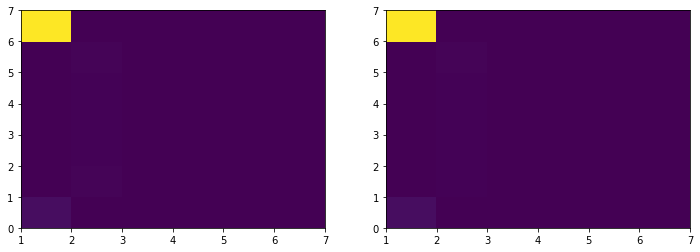

In [93]:
for k in keys:
    train_nan = np.isnan(train_x10_42[k]).sum(axis=1)
    test_nan = np.isnan(test_x10_42[k]).sum(axis=1)
    
    train_no_nan = np.where(np.isnan(train_x10_42[k]), -1, train_x10_42[k])
    test_no_nan = np.where(np.isnan(test_x10_42[k]), -1, test_x10_42[k])
    
    train_unique = np.array([len(np.unique(t)) for t in train_no_nan])
    test_unique = np.array([len(np.unique(t)) for t in test_no_nan])
    
    print(k)
    f, axarr = plt.subplots(1, 2)
    f.set_figwidth(12)
    axarr[0].hist2d(train_unique, train_nan, [np.arange(1, 8), np.arange(0, 8)])
    axarr[1].hist2d(test_unique, test_nan, [np.arange(1, 8), np.arange(0, 8)])
    plt.show()
    print('=' * 100)

10, 11, 12, 23, 24, 25, 27, 29, 30, 31, 32, 33, 37, 38, 40, 41, 42 - a lot of nan

13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 28, 34, 35, 36, 39 - ok

## Dataset

In [94]:
def build_time(raw_data):
    data = raw_data.to_numpy()
    data = np.array(list(map(str_to_timestamp, data)))
    return data.reshape(-1, 1)

In [95]:
def build_cont(raw_data):
    data = raw_data.to_numpy()
    return data.reshape(-1, 1)

In [96]:
def build_cat(raw_data):
    data = raw_data.to_numpy()
    return data.reshape(-1, 1)

In [97]:
def build_series(raw_data):
    data = raw_data.to_numpy()
    
    res = []
    for a in data:
        a = str_to_arr(a)
        mask = ~np.isnan(a)
        mean = (a * mask).sum() / mask.sum()
        res += [[mean]]
    
    return np.array(res)

In [98]:
def build_arr_6(raw_data):
    data = raw_data.to_numpy()
    data = np.array(list(map(str_to_arr, data)))
    return data

In [99]:
# nan in 2, 5, 8, 9, 10-42
def build_x(raw_data):
    x = []
    
    x += [build_time(raw_data['x2'])]
    
    cont_n = [4, 6]
    for i in cont_n:
        x += [build_cont(raw_data[f'x{i}'])]
    
    cat_n = [1, 3, 5, 7]
    for i in cat_n:
        x += [build_cat(raw_data[f'x{i}'])]
    
    series_n = [8, 9]
    for i in series_n:
        x += [build_series(raw_data[f'x{i}'])]
    
    arr_6_n = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 28, 34, 35, 36, 39]
    for i in arr_6_n:
        x += [build_arr_6(raw_data[f'x{i}'])]
        
    return np.concatenate(x, axis=1)

In [100]:
def build_dataset(train_raw_data, test_raw_data):
    raw_data = pd.concat([train_raw_data, test_raw_data], sort=False)
    raw_data = raw_data.reset_index()
    raw_data = raw_data.drop(columns=['index'])
    
    x = build_x(raw_data)
    y = train_raw_data['y'].to_numpy()
    
    n_test = len(test_raw_data)
    x, x_test = x[:-n_test], x[-n_test:]
    
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    
    return (x_train, y_train), (x_val, y_val), x_test

In [101]:
(x_train, y_train), (x_val, y_val), x_test = build_dataset(train_raw_data, test_raw_data)

# Training

In [102]:
model = CatBoostClassifier()
train_pool = Pool(x_train, y_train)
val_pool = Pool(x_val, y_val)

model.fit(
    train_pool,
    plot=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [103]:
model.eval_metrics(val_pool, ['AUC'])['AUC'][-1]

0.8896553758345349

In [104]:
y_test = model.predict_proba(x_test)[:, 1]

# Answer

In [105]:
test_id = test_raw_data['id'].to_numpy()

In [106]:
with open('ans.out', 'w') as f:
    for i, p in zip(test_id, y_test):
        f.write(f'{i};{p}\n')